In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
import os
import os.path as op

import matplotlib.image as mpimg
from neuromaps import transforms
from matplotlib.gridspec import GridSpec
import pandas as pd
from gradec.utils import _zero_medial_wall
import nibabel as nib
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from surfplot import Plot
from nilearn import datasets
from gradec.plot import plot_radar, plot_cloud
from gradec.fetcher import _fetch_features, _fetch_frequencies, _fetch_classification
from gradec.utils import _decoding_filter
from nimare.decode.continuous import CorrelationDecoder
import numpy as np
from nilearn.maskers import NiftiMasker
from nilearn.image import threshold_img, index_img
from neuromaps.datasets import fetch_fslr
from nimare.transforms import p_to_z
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import nilearn.reporting

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from nilearn import datasets, plotting, image

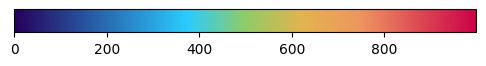

In [6]:
# Define the number of colors in the colormap
num_colors = 1000

# Define anchor points for key colors using hex values
colors = [
    "#26005c",  # Dark Blue
    "#274492",
    "#2888c9",
    "#29ccff",  # light blue
    "#8FCC66",  # green
    "#e4b24e",  # Yellow (adjusted)
    "#ee955f",  # Orange
    "#dd4a53",  # Orange
    "#cc0047",  # Red
]

# Create a smooth interpolation for the custom colormap
CMAP = LinearSegmentedColormap.from_list("custom_cmap", colors, N=num_colors)

# Plot the color gradient
plt.figure(figsize=(8, 2))
plt.imshow([list(range(num_colors))], aspect="auto", cmap=CMAP)
plt.gca().set_visible(False)
plt.colorbar(orientation="horizontal")
plt.show()

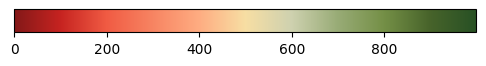

In [7]:
# Define the number of colors in the colormap
num_colors = 1000

# Define anchor points for key colors using hex values
colors = [
    "#831818",  # Dark Blue
    "#C62320",
    "#F05B43",
    "#F78462",  # light blue
    "#FEAC81",  # green
    "#F7DEA3",  # Yellow (adjusted)
    "#CED1AF",  # Orange
    "#98AB76",  # Orange
    "#748F46",  # Red
    "#47632A",  # Red
    "#275024",
]

# Create a smooth interpolation for the custom colormap
Paquin = LinearSegmentedColormap.from_list("custom_cmap", colors, N=num_colors)

# Plot the color gradient
plt.figure(figsize=(8, 2))
plt.imshow([list(range(num_colors))], aspect="auto", cmap=Paquin)
plt.gca().set_visible(False)
plt.colorbar(orientation="horizontal")
plt.show()

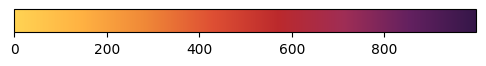

In [8]:
# Define the number of colors in the colormap
num_colors = 1000

# Define anchor points for key colors using hex values
colors = [
    "#FFD353",
    "#FFB242",
    "#EF8737",
    "#DE4F33",
    "#BB292C",
    "#9F2D55",
    "#62205F",
    "#341648",
]

# Create a smooth interpolation for the custom colormap
Tam = LinearSegmentedColormap.from_list("custom_cmap", colors, N=num_colors)

# Plot the color gradient
plt.figure(figsize=(8, 2))
plt.imshow([list(range(num_colors))], aspect="auto", cmap=Tam)
plt.gca().set_visible(False)
plt.colorbar(orientation="horizontal")
plt.show()

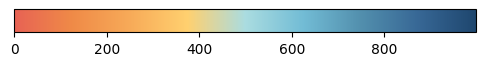

In [9]:
# Define the number of colors in the colormap
num_colors = 1000

# Define anchor points for key colors using hex values
colors = [
    "#E76254",
    "#EF8A47",
    "#F7AA58",
    "#FFD06F",
    # "#FFE6B7", #cream
    "#AADCE0",
    "#72BCD5",
    "#528FAD",
    "#376795",
    "#1E466E",
]

# Create a smooth interpolation for the custom colormap
Hiroshige = LinearSegmentedColormap.from_list("custom_cmap", colors, N=num_colors)

# Plot the color gradient
plt.figure(figsize=(8, 2))
plt.imshow([list(range(num_colors))], aspect="auto", cmap=Hiroshige)
plt.gca().set_visible(False)
plt.colorbar(orientation="horizontal")
plt.show()

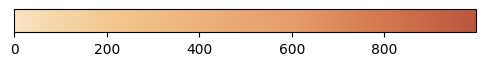

In [10]:
# Define the number of colors in the colormap
num_colors = 1000

# Define anchor points for key colors using hex values
colors = [
    "#FBE3C2",
    "#F2C88F",
    "#ECB27D",
    "#E69C6B",
    "#D37750",
    "#B9563F",
]

# Create a smooth interpolation for the custom colormap
OKeeffe = LinearSegmentedColormap.from_list("custom_cmap", colors, N=num_colors)

# Plot the color gradient
plt.figure(figsize=(8, 2))
plt.imshow([list(range(num_colors))], aspect="auto", cmap=OKeeffe)
plt.gca().set_visible(False)
plt.colorbar(orientation="horizontal")
plt.show()

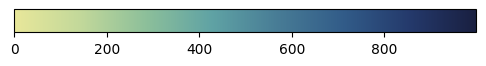

In [11]:
# Define the number of colors in the colormap
num_colors = 1000

# Define anchor points for key colors using hex values
colors = [
    "#E8E79A",
    "#C2D89A",
    "#8CBF9A",
    "#5FA2A4",
    "#477B95",
    "#315B88",
    "#24396B",
    "#191F40",    
]

# Create a smooth interpolation for the custom colormap
Ernst = LinearSegmentedColormap.from_list("custom_cmap", colors, N=num_colors)

# Plot the color gradient
plt.figure(figsize=(8, 2))
plt.imshow([list(range(num_colors))], aspect="auto", cmap=Ernst)
plt.gca().set_visible(False)
plt.colorbar(orientation="horizontal")
plt.show()

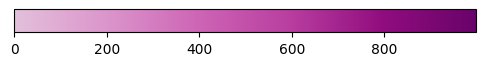

In [12]:
# Define the number of colors in the colormap
num_colors = 1000

# Define anchor points for key colors using hex values
colors = [
    "#E3C0DB",
    "#DB95CB",
    "#CD64B5",
    "#B83D9F",
    "#900C7E",
    "#680369",
]

# Create a smooth interpolation for the custom colormap
Flash = LinearSegmentedColormap.from_list("custom_cmap", colors, N=num_colors)

# Plot the color gradient
plt.figure(figsize=(8, 2))
plt.imshow([list(range(num_colors))], aspect="auto", cmap=Flash)
plt.gca().set_visible(False)
plt.colorbar(orientation="horizontal")
plt.show()

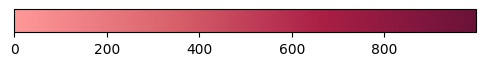

In [13]:
# Define the number of colors in the colormap
num_colors = 1000

# Define anchor points for key colors using hex values
colors = [
    "#FF9898",
    "#D9636C",
    "#A91E45",
    "#691238",
]

# Create a smooth interpolation for the custom colormap
Althoff = LinearSegmentedColormap.from_list("custom_cmap", colors, N=num_colors)

# Plot the color gradient
plt.figure(figsize=(8, 2))
plt.imshow([list(range(num_colors))], aspect="auto", cmap=Althoff)
plt.gca().set_visible(False)
plt.colorbar(orientation="horizontal")
plt.show()

In [14]:
def trim_image(img=None, tol=1, fix=True):
    if fix:
        mask = img != tol
    else:
        mask = img <= tol
    if img.ndim == 3:
        mask = mask.any(2)
    mask0, mask1 = mask.any(0), mask.any(1)
    return img[np.ix_(mask1, mask0)]

In [15]:
def plot_stat(
    nii_img_thr, threshold, mask_contours=None, vmax=8, alpha=1, cmap=Althoff
):
    # Fetch the MNI152 template at higher resolution
    template = datasets.load_mni152_template(resolution=0.5)

    fig = plt.figure()

    plotting.plot_stat_map(
        nii_img_thr,
        bg_img=template,
        black_bg=False,
        draw_cross=False,
        annotate=True,
        alpha=alpha,
        cmap=cmap,
        threshold=threshold,
        cut_coords=[1, 1, -28],
        vmax=vmax,
    )

    return fig

In [16]:
def plot_vol(
    nii_img_thr, threshold, mask_contours=None, vmax=6, alpha=1, cmap=Althoff, dim=-0.45
):
    template = datasets.load_mni152_template(resolution=1)

    display_modes = ["x", "y", "z"]
    fig = plt.figure(figsize=(5, 5))
    fig.subplots_adjust(
        left=None, bottom=None, right=None, top=None, wspace=None, hspace=None
    )
    gs = GridSpec(2, 2, figure=fig)

    for dsp_i, display_mode in enumerate(display_modes):
        if display_mode == "z":
            ax = fig.add_subplot(gs[:, 1], aspect="equal")
            colorbar = True
        else:
            ax = fig.add_subplot(gs[dsp_i, 0], aspect="equal")
            colorbar = False

        display = plot_stat_map(
            nii_img_thr,
            bg_img=template,
            black_bg=False,
            draw_cross=False,
            annotate=True,
            alpha=alpha,
            cmap=cmap,
            threshold=threshold,
            colorbar=colorbar,
            display_mode=display_mode,
            cut_coords=1,
            vmax=vmax,
            axes=ax,
            dim=dim,  # Adjusted dimming factor
        )
        if mask_contours:
            display.add_contours(mask_contours, levels=[0.5], colors="black")

    return fig

In [17]:
# Kate Made Edits
def plot_vol2(
    nii_img_thr, threshold, mask_contours=None, vmax=6, alpha=1, cmap=OKeeffe, dim=-0.45
):
    template = datasets.load_mni152_template(resolution=1)

    # Create a figure with 9 subplots in a single row
    fig, axes = plt.subplots(1, 9, figsize=(27, 3))

    # Define slices for x, y, z directions
    """Thal"""
    slices_x = [-14, -16, 0]
    slices_y = [-26, -24, 0]
    slices_z = [8, 10, 0]
    """PCC
    slices_x = [-10, -14]
    slices_y = [-26, -24]
    slices_z = [36, 38]"""

    # Combine all slices into a single list for easy iteration
    slices = slices_y + slices_x + slices_z
    display_modes = ["y"] * 3 + ["x"] * 3 + ["z"] * 3

    # Iterate over the slices and axes
    for i, (slice, display_mode, ax) in enumerate(zip(slices, display_modes, axes)):
        display = plot_stat_map(
            nii_img_thr,
            bg_img=template,
            display_mode=display_mode,
            cut_coords=[slice],
            black_bg=False,
            draw_cross=False,
            annotate=True,
            alpha=alpha,
            cmap=cmap,
            threshold=threshold,
            colorbar=False,  # Disable individual colorbars
            vmax=vmax,
            dim=dim,  # Adjusted dimming factor
            axes=ax,
        )

        if mask_contours:
            display.add_contours(mask_contours, levels=[0.5], colors="black")

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to fit the colorbar
    return fig

In [18]:
# Kate Made Edits
def plot_vol2P(
    nii_img_thr, threshold, mask_contours=None, vmax=6, alpha=1, cmap=Flash, dim=-0.45
):
    template = datasets.load_mni152_template(resolution=1)

    # Create a figure with 9 subplots in a single row
    fig, axes = plt.subplots(1, 9, figsize=(27, 3))

    # Define slices for x, y, z directions
    """Thal"""
    """slices_x = [-14, -16]
    slices_y = [-26, -24]
    slices_z = [8, 10]"""
    """PCC"""
    slices_x = [-10, -14, 0]
    slices_y = [-26, -24, 0]
    slices_z = [36, 38, 0]

    # Combine all slices into a single list for easy iteration
    slices = slices_y + slices_x + slices_z
    display_modes = ["y"] * 3 + ["x"] * 3 + ["z"] * 3

    # Iterate over the slices and axes
    for i, (slice, display_mode, ax) in enumerate(zip(slices, display_modes, axes)):
        display = plot_stat_map(
            nii_img_thr,
            bg_img=template,
            display_mode=display_mode,
            cut_coords=[slice],
            black_bg=False,
            draw_cross=False,
            annotate=True,
            alpha=alpha,
            cmap=cmap,
            threshold=threshold,
            colorbar=False,  # Disable individual colorbars
            vmax=vmax,
            dim=dim,  # Adjusted dimming factor
            axes=ax,
        )

        if mask_contours:
            display.add_contours(mask_contours, levels=[0.5], colors="black")

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to fit the colorbar
    return fig

In [19]:
# Kate Made Edits
# for cmap=CMAP in line 2, you can change to whatever color scheme you want
def plot_surf(nii_img_thr, mask_contours=None, vmax=8, cmap=OKeeffe):
    map_lh, map_rh = transforms.mni152_to_fslr(nii_img_thr, fslr_density="32k")
    map_lh, map_rh = _zero_medial_wall(
        map_lh,
        map_rh,
        space="fsLR",
        density="32k",
    )
    # midthickness

    surfaces = fetch_fslr(density="32k")
    lh, rh = surfaces["inflated"]
    sulc_lh, sulc_rh = surfaces["sulc"]

    p = Plot(surf_lh=lh, surf_rh=rh, layout="grid")
    p.add_layer({"left": sulc_lh, "right": sulc_rh}, cmap="binary_r", cbar=False)
    p.add_layer(
        {"left": map_lh, "right": map_rh},
        cmap=cmap,
        cbar=False,
        color_range=(-vmax, vmax),
    )
    if mask_contours:
        mask_lh, mask_rh = transforms.mni152_to_fslr(mask_contours, fslr_density="32k")
        mask_lh, mask_rh = _zero_medial_wall(
            mask_lh,
            mask_rh,
            space="fsLR",
            density="32k",
        )
        mask_arr_lh = mask_lh.agg_data()
        mask_arr_rh = mask_rh.agg_data()
        countours_lh = np.zeros_like(mask_arr_lh)
        countours_lh[mask_arr_lh != 0] = 1
        countours_rh = np.zeros_like(mask_arr_rh)
        countours_rh[mask_arr_rh != 0] = 1

        colors = [(0, 0, 0, 0)]
        contour_cmap = ListedColormap(colors, "regions", N=1)
        line_cmap = ListedColormap(["black"], "regions", N=1)
        p.add_layer(
            {"left": countours_lh, "right": countours_rh},
            cmap=line_cmap,
            as_outline=True,
            cbar=False,
        )
        p.add_layer(
            {"left": countours_lh, "right": countours_rh},
            cmap=contour_cmap,
            cbar=False,
        )

    return p.build()

In [20]:
# Kate Made Edits
# for cmap=CMAP in line 2, you can change to whatever color scheme you want
def plot_surfP(nii_img_thr, mask_contours=None, vmax=8, cmap=Flash):
    map_lh, map_rh = transforms.mni152_to_fslr(nii_img_thr, fslr_density="32k")
    map_lh, map_rh = _zero_medial_wall(
        map_lh,
        map_rh,
        space="fsLR",
        density="32k",
    )
    # midthickness

    surfaces = fetch_fslr(density="32k")
    lh, rh = surfaces["inflated"]
    sulc_lh, sulc_rh = surfaces["sulc"]

    p = Plot(surf_lh=lh, surf_rh=rh, layout="grid")
    p.add_layer({"left": sulc_lh, "right": sulc_rh}, cmap="binary_r", cbar=False)
    p.add_layer(
        {"left": map_lh, "right": map_rh},
        cmap=cmap,
        cbar=False,
        color_range=(-vmax, vmax)
    )
    if mask_contours:
        mask_lh, mask_rh = transforms.mni152_to_fslr(mask_contours, fslr_density="32k")
        mask_lh, mask_rh = _zero_medial_wall(
            mask_lh,
            mask_rh,
            space="fsLR",
            density="32k",
        )
        mask_arr_lh = mask_lh.agg_data()
        mask_arr_rh = mask_rh.agg_data()
        countours_lh = np.zeros_like(mask_arr_lh)
        countours_lh[mask_arr_lh != 0] = 1
        countours_rh = np.zeros_like(mask_arr_rh)
        countours_rh[mask_arr_rh != 0] = 1

        colors = [(0, 0, 0, 0)]
        contour_cmap = ListedColormap(colors, 'regions', N=1)
        line_cmap = ListedColormap(["black"], 'regions', N=1)
        p.add_layer(
            {"left": countours_lh, "right": countours_rh}, 
            cmap=line_cmap, 
            as_outline=True, 
            cbar=False
        )
        p.add_layer(
            {"left": countours_lh, "right": countours_rh},
            cmap=contour_cmap,
            cbar=False,
        )

    return p.build()

In [21]:
data_dir = "./"
results_dir = op.join(data_dir, "results")


In [22]:
results_dir

'./results'

In [23]:
DSET, MODEL = "neuroquery", "lda"
decoding_dir = op.join(data_dir, "decoding")
decoder_fn = op.join(decoding_dir, f"{MODEL}_{DSET}_decoder.pkl.gz")

decoder = CorrelationDecoder.load(decoder_fn)

features = _fetch_features(DSET, MODEL, data_dir=decoding_dir)
frequencies = _fetch_frequencies(DSET, MODEL, data_dir=decoding_dir)
classification, class_lst = _fetch_classification(DSET, MODEL, data_dir=decoding_dir)

In [24]:
features

[['insula',
  'anterior insula',
  'disgust',
  'interoceptive',
  'insular cortex',
  'posterior insula',
  'bilateral',
  'ci',
  'ds',
  'process',
  'role',
  'right',
  'involved',
  'interaction',
  'bodily',
  'awareness',
  'sensitive',
  'state',
  'body',
  'information',
  'feeling',
  'well',
  'sensation',
  'visceral',
  'subject',
  'dorsal anterior',
  'core',
  'somatic',
  'cortex',
  'cingulate cortex',
  'attention',
  'internal',
  'frontal operculum',
  'involvement',
  'analysis',
  'sensory',
  'insular region',
  'ventral anterior',
  'representation',
  'insular cortices'],
 ['picture',
  'valence',
  'arousal',
  'neural',
  'stimuli',
  'viewing',
  'rating',
  'neutral pictures',
  'image',
  'presented',
  'related',
  'contrast',
  'specific',
  'neutral stimuli',
  'set',
  'dimensional',
  'relevant',
  'fixation',
  'see',
  'aversive',
  'brain',
  'subject',
  'finding',
  'effect',
  'general',
  'stimulus',
  'unpleasant',
  'higher',
  'event',
  

In [25]:
mask_img = datasets.load_mni152_brain_mask(resolution=1)
masker = NiftiMasker(mask_img=mask_img)
masker = masker.fit()

In [26]:
'''test_dict = {
    "1s": "Group Average (One-Sample T-Test)",
    "2s": "Group Comparison (Two-Sample Unpaired T-Test: ASD-TD)",
}'''



'test_dict = {\n    "1s": "Group Average (One-Sample T-Test)",\n    "2s": "Group Comparison (Two-Sample Unpaired T-Test: ASD-TD)",\n}'

/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:104: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Ident

   Cluster ID     X     Y     Z  Peak Stat  Cluster Size (mm3)
0           1 -14.0 -10.0  18.0   3.719016              161872
1           2   0.0   8.0  46.0   3.719016               23864
2           3  42.0 -40.0  40.0   3.719016               28312


/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_20029/3024509896.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to fit the colorbar
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand t

   Cluster ID     X     Y     Z  Peak Stat  Cluster Size (mm3)
0           1 -10.0   8.0   6.0   3.719016              110592
1           2  -2.0 -10.0  38.0   3.719016               46248


/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_20029/3024509896.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to fit the colorbar
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand t

   Cluster ID    X     Y     Z  Peak Stat  Cluster Size (mm3)
0           1 -2.0 -16.0  16.0   3.719016              347008


/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_20029/3024509896.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to fit the colorbar
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


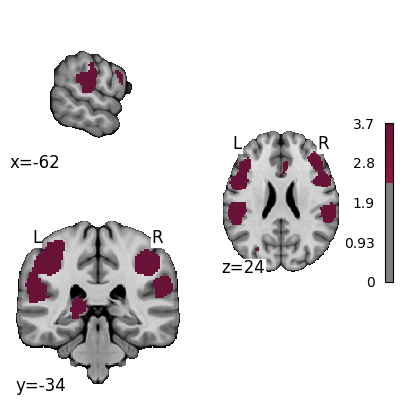

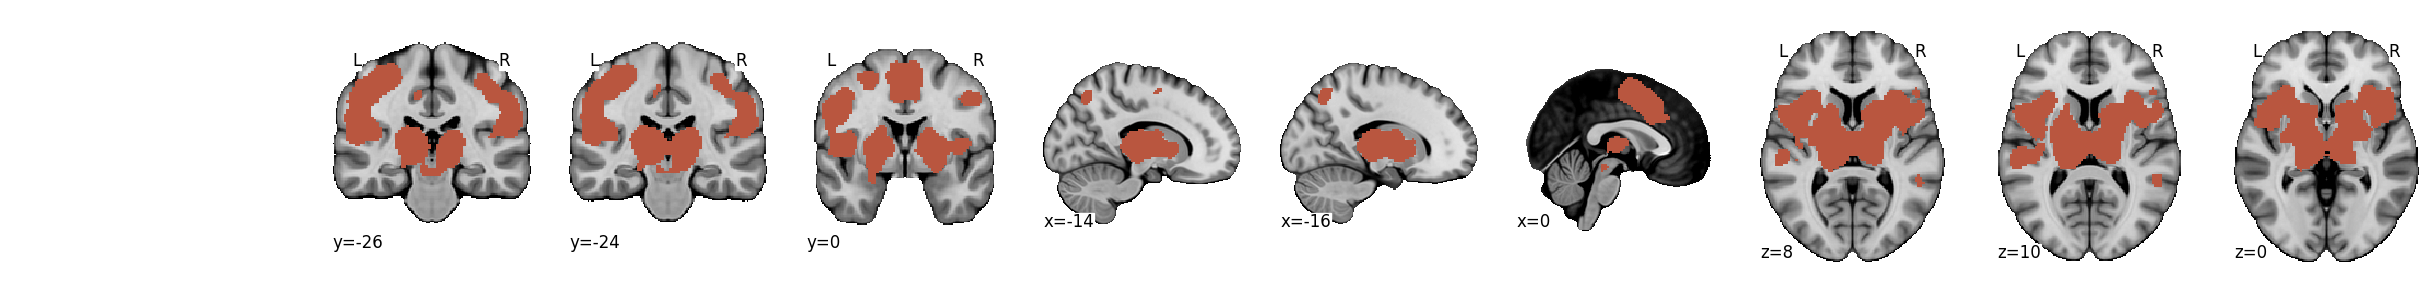

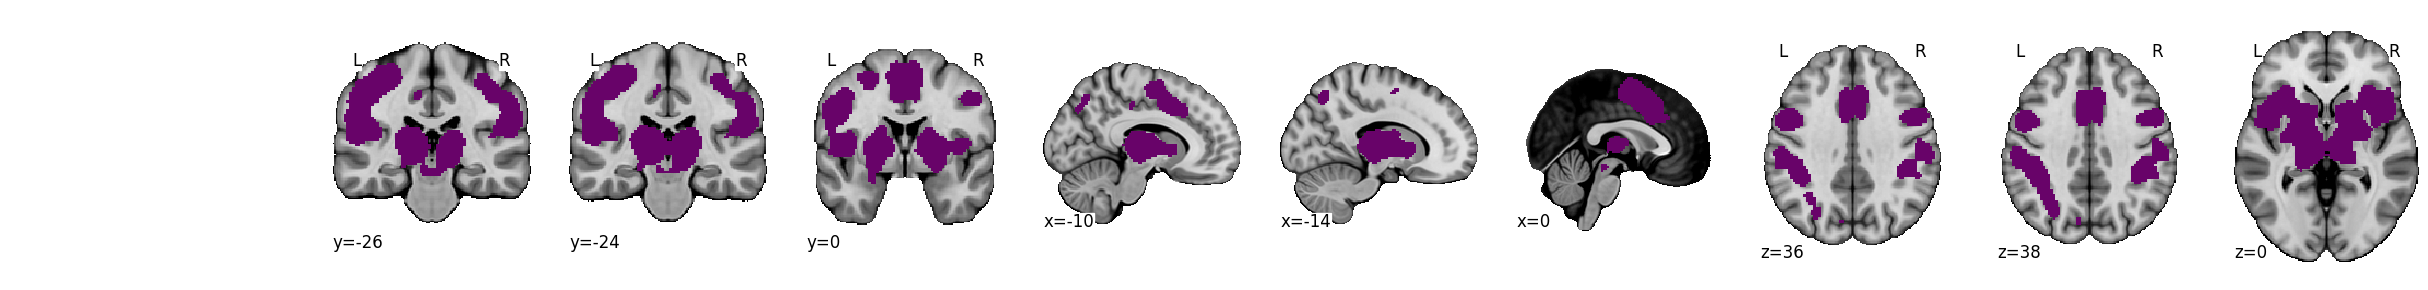

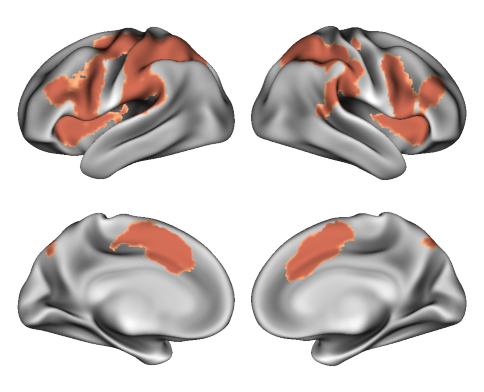

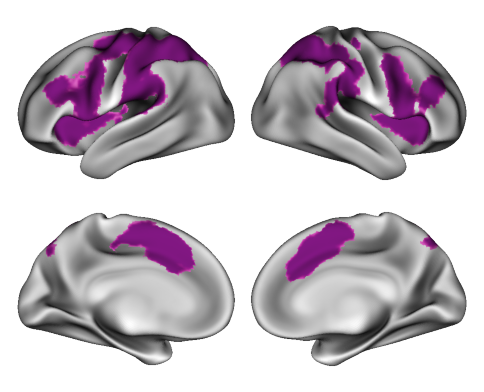

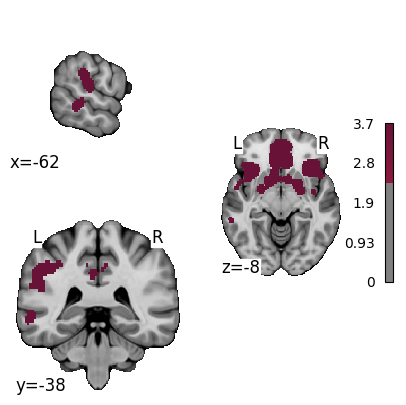

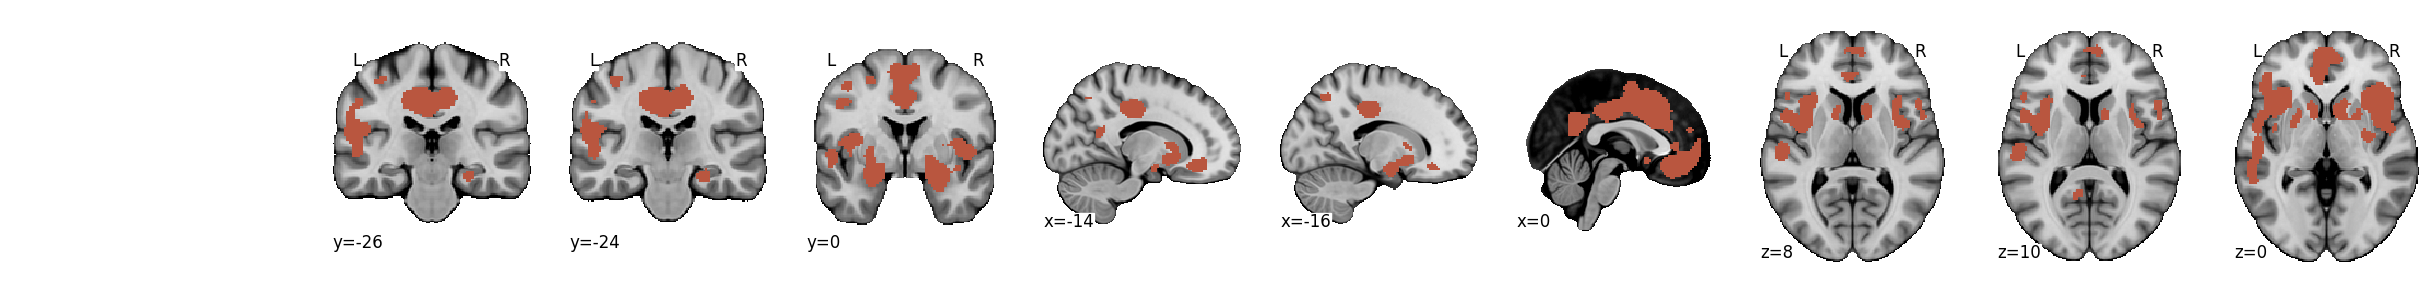

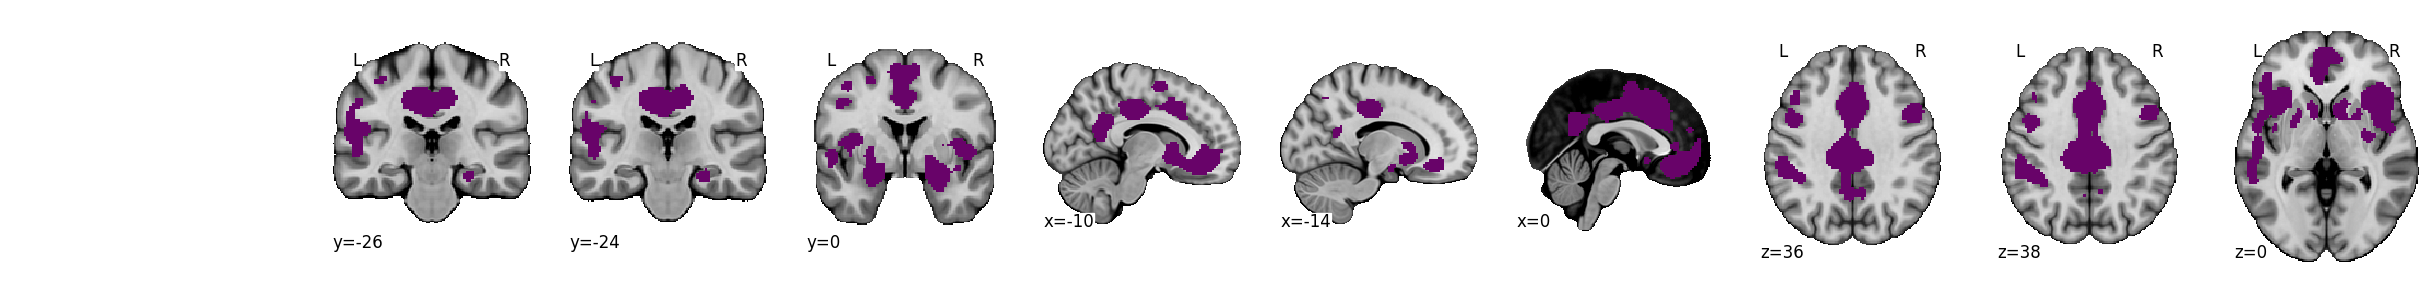

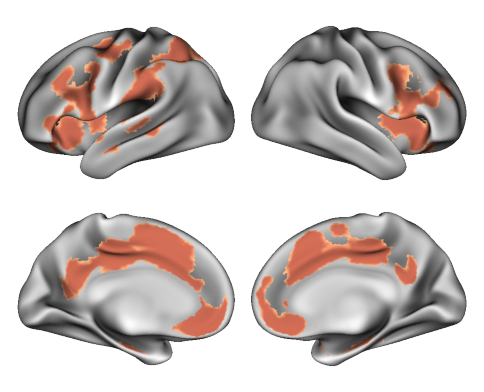

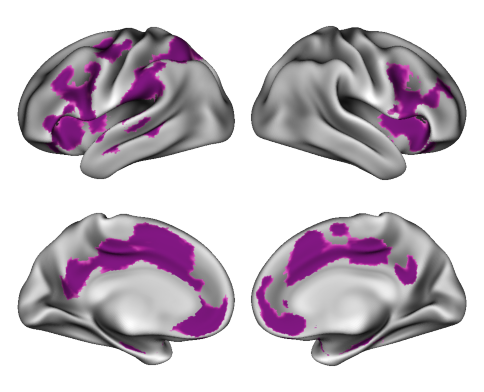

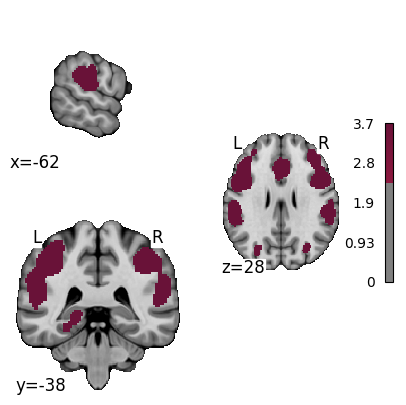

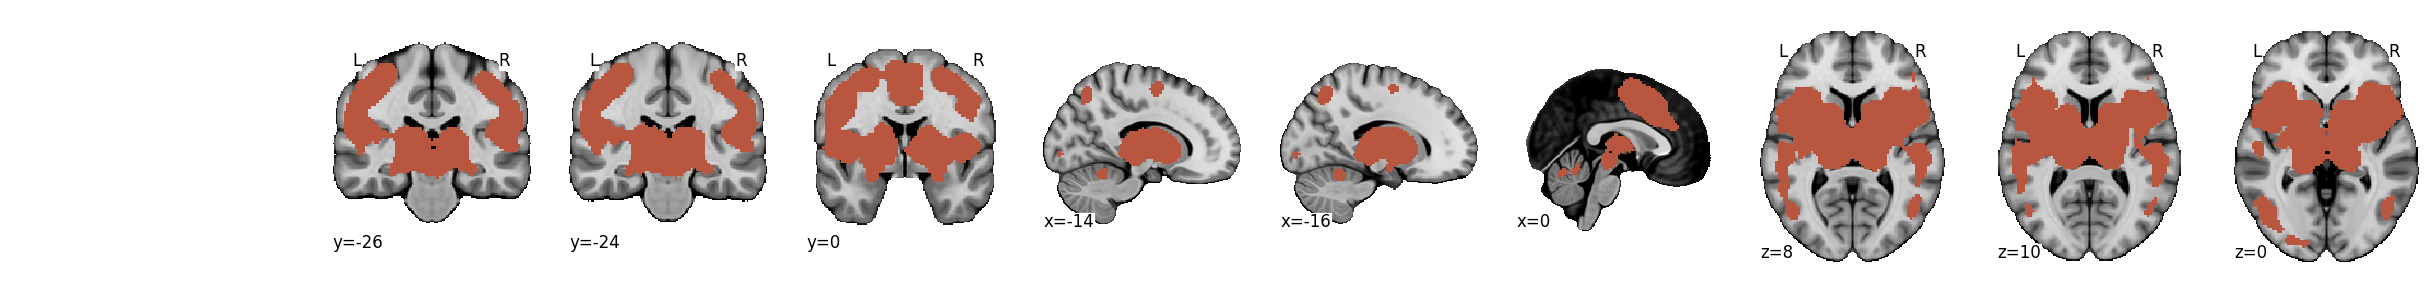

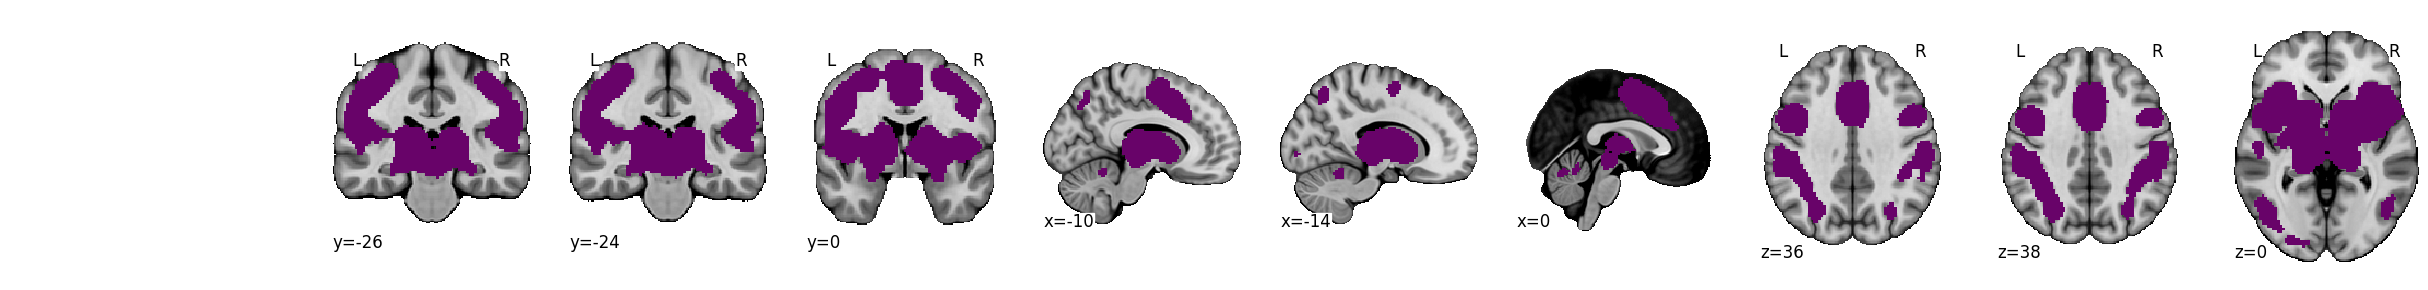

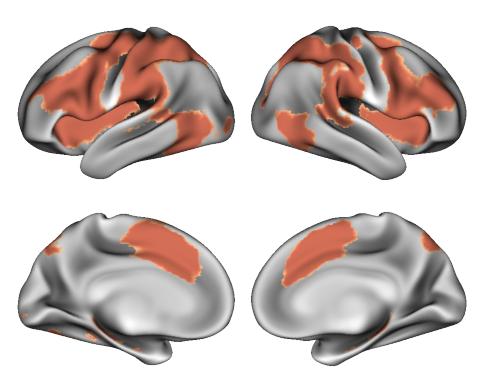

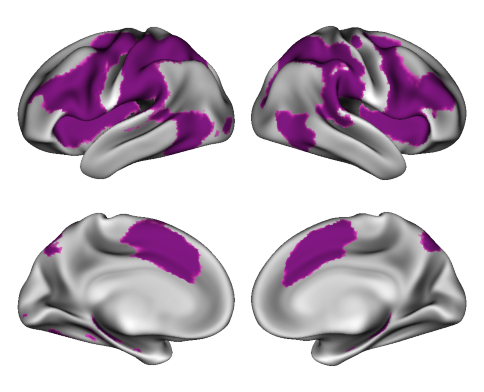

In [28]:
# Kate Made Edits
rois = ["thalamus", "PCC", "OMNI"]

z_thresh = 2.33
clust_thresh = 10

for roi in rois:
    roi_dir = op.join(results_dir, f"{roi}")
    nii_img = nib.load(
        op.join(roi_dir, "z_desc-mass_level-cluster_corr-FWE_method-montecarlo.nii.gz")
    )
    nii_thr_img = threshold_img(nii_img, z_thresh, cluster_threshold=clust_thresh)
    nii_arr = masker.transform(nii_img)
    nii_thr_arr = masker.transform(nii_thr_img)

    clusters = nilearn.reporting.get_clusters_table(
        nii_thr_img, z_thresh, two_sided=True
    )
    print(clusters)

    vmax = round(np.max(np.abs(nii_thr_arr)), 2)
    vmax = 13 if vmax > 13 else vmax

    # Plot volume and surface plots
    vol_fig = plot_vol(nii_thr_img, z_thresh, vmax=vmax)
    vol2_fig = plot_vol2(nii_thr_img, z_thresh, vmax=vmax)
    vol2P_fig = plot_vol2P(nii_thr_img, z_thresh, vmax=vmax)
    surf_fig = plot_surf(nii_thr_img, vmax=vmax)
    surfP_fig = plot_surfP(nii_thr_img, vmax=vmax)

    nii_pos_arr = np.where(nii_arr > 0, nii_arr, 0)
    img_to_decode = masker.inverse_transform(nii_pos_arr)

    corrs_df = decoder.transform(img_to_decode)
    num_val = [
        int(lab.split("__")[1].split("_")[0]) for lab in corrs_df.index.to_list()
    ]
    indices = np.argsort(num_val)
    corrs_df = corrs_df.iloc[indices]
    filtered_df, filtered_features, filtered_frequencies = _decoding_filter(
        corrs_df,
        features,
        classification,
        freq_by_topic=frequencies,
        class_by_topic=class_lst,
        class_to_keep=["Anatomical"],
    )

    # KATE ISN'T SURE THIS IS HOW THIS SHOULD LOOK:
    # Kate to Julio: is there a way to get a table of the values for the functional decoding?
    # Kate to Julio: Ex: term 'anticipation' is 0.235, while 'error' is 0.216
    # Julio to Kate: Look for this DataFrame: filtered_df.
    # Julio to Kate: You can save that by doing: filtered_df.to_csv(path/to/your.csv)
    fig_dir = op.join(roi_dir, "fig")
    filtered_df.to_csv(op.join(fig_dir, f"{roi}_anat.csv"))

    # Visualize functional decoding results
    corrs = filtered_df["r"].to_numpy()

    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    # Radar plot
    plot_radar(
        corrs,
        filtered_features,
        MODEL,
        cmap=Flash,
        out_fig=op.join(fig_dir, f"{roi}_Fradaranat.png"),
    )

    # Radar color 2
    plot_radar(
        corrs,
        filtered_features,
        MODEL,
        cmap=Hiroshige,
        out_fig=op.join(fig_dir, f"{roi}_Hradaranat.png"),
    )

    # Radar color 3
    plot_radar(
        corrs,
        filtered_features,
        MODEL,
        cmap=OKeeffe,
        out_fig=op.join(fig_dir, f"{roi}_OKradaranat.png"),
    )

    # Word cloud plot
    plot_cloud(
        corrs,
        filtered_features,
        MODEL,
        width=5,
        height=5,
        frequencies=filtered_frequencies,
        cmap=Hiroshige,
        out_fig=op.join(fig_dir, f"{roi}_wordcloudanat.png"),
    )
    # word cloud 2
    plot_cloud(
        corrs,
        filtered_features,
        MODEL,
        width=5,
        height=5,
        frequencies=filtered_frequencies,
        cmap=Flash,
        out_fig=op.join(fig_dir, f"{roi}_wordcloudFanat.png"),
    )

    # word cloud 2
    plot_cloud(
        corrs,
        filtered_features,
        MODEL,
        width=5,
        height=5,
        frequencies=filtered_frequencies,
        cmap=OKeeffe,
        out_fig=op.join(fig_dir, f"{roi}_wordcloudOKanat.png"),
    )

    vol_fig.savefig(op.join(fig_dir, f"{roi}_volume.png"), bbox_inches="tight", dpi=300)
    vol2_fig.savefig(
        op.join(fig_dir, f"{roi}_volume2.png"), bbox_inches="tight", dpi=300
    )
    vol2P_fig.savefig(
        op.join(fig_dir, f"{roi}_volume2P.png"), bbox_inches="tight", dpi=300
    )
    surf_fig.savefig(
        op.join(fig_dir, f"{roi}_surface.png"), bbox_inches="tight", dpi=300
    )
    surfP_fig.savefig(
        op.join(fig_dir, f"{roi}_surfaceP.png"), bbox_inches="tight", dpi=300
    )

/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:104: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Ident

   Cluster ID     X     Y     Z  Peak Stat  Cluster Size (mm3)
0           1 -14.0 -10.0  18.0   3.719016              161872
1           2   0.0   8.0  46.0   3.719016               23864
2           3  42.0 -40.0  40.0   3.719016               28312


/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_20029/3024509896.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to fit the colorbar
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand t

   Cluster ID     X     Y     Z  Peak Stat  Cluster Size (mm3)
0           1 -10.0   8.0   6.0   3.719016              110592
1           2  -2.0 -10.0  38.0   3.719016               46248


/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_20029/3024509896.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to fit the colorbar
/Users/chloehampson/Desktop/projects/crooks_macm/.venv/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


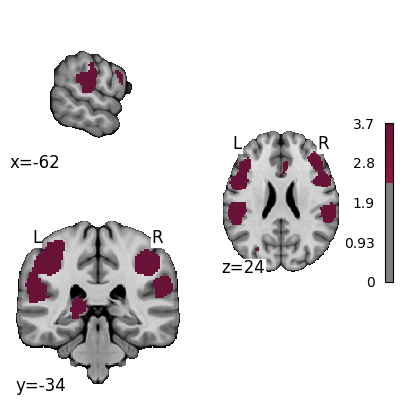

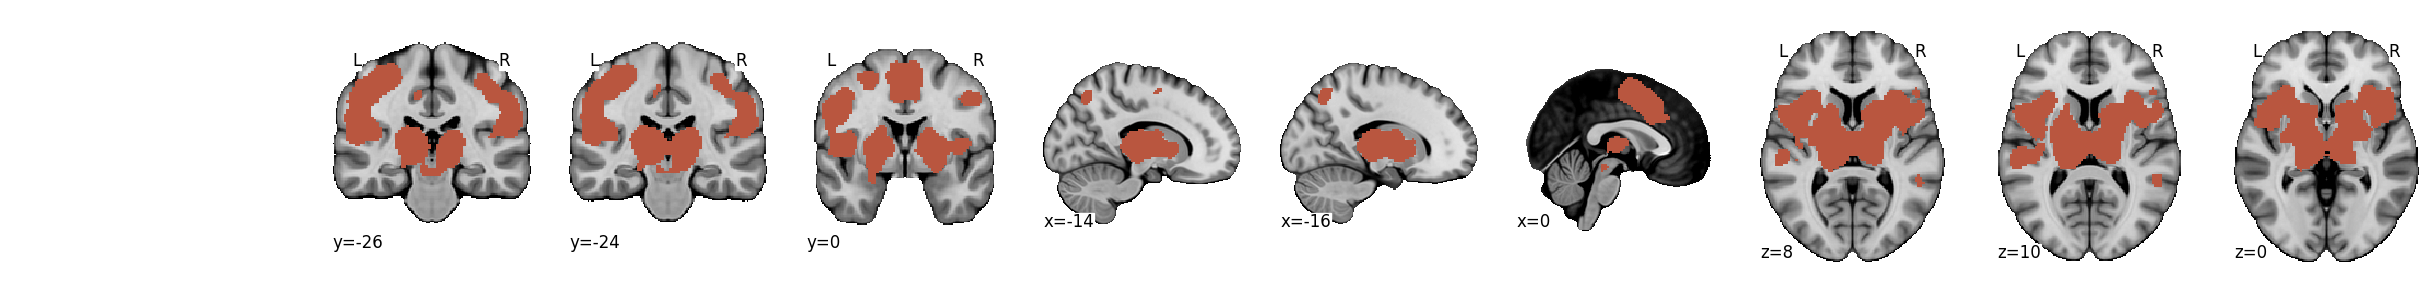

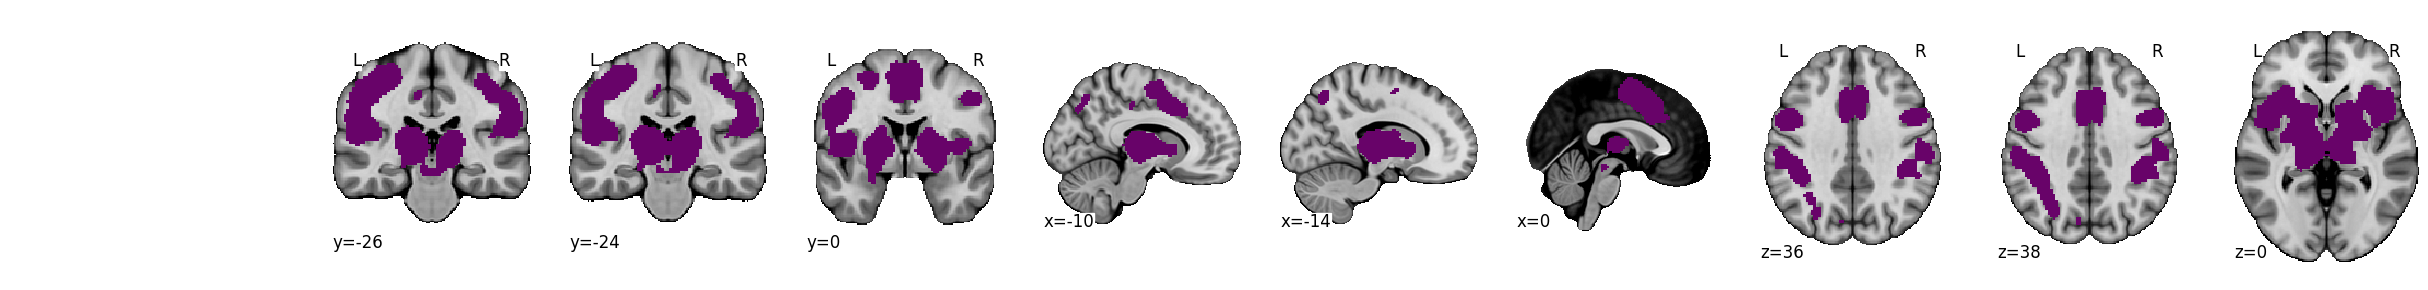

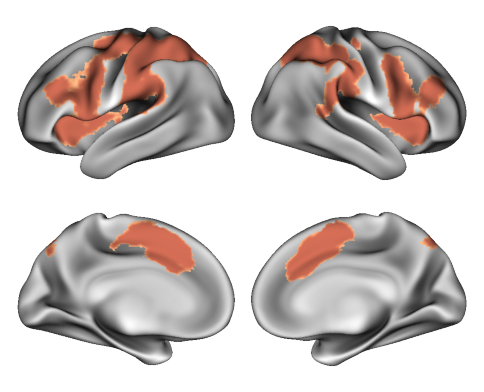

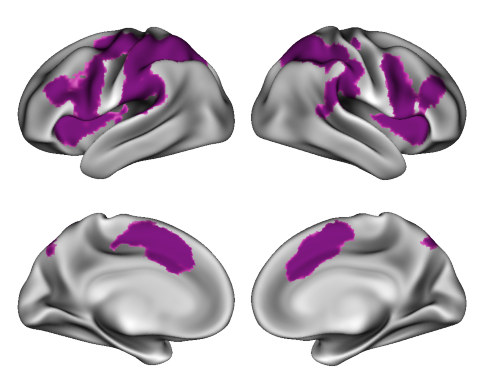

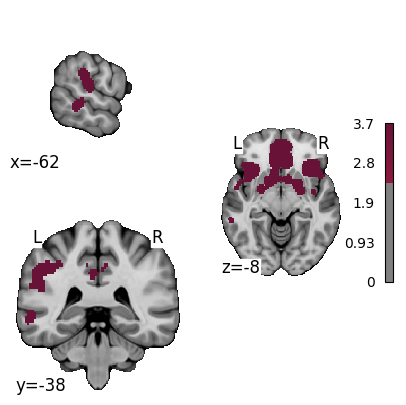

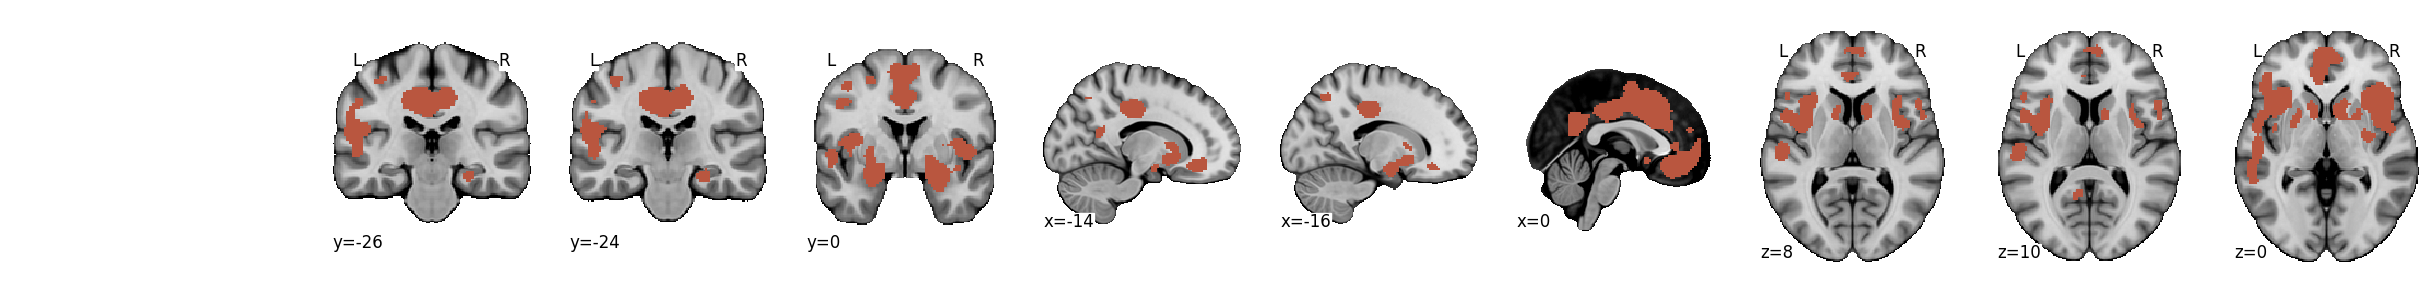

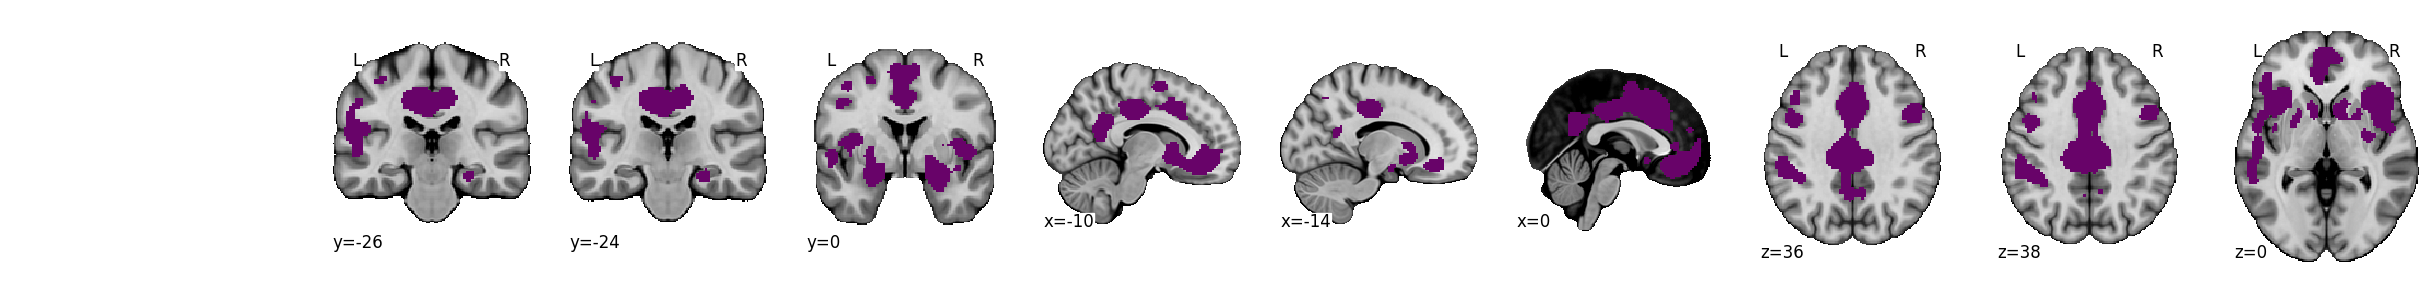

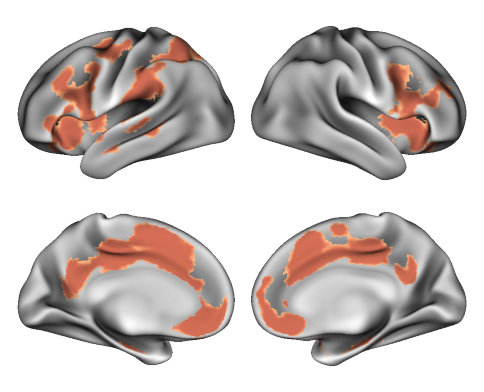

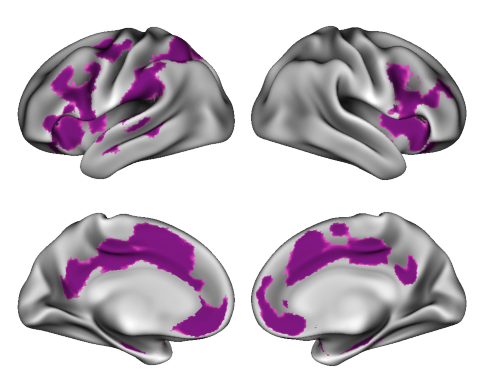

In [29]:
# Kate Made Edits
rois = ["thalamus", "PCC"]

z_thresh = 2.33
clust_thresh = 10

for roi in rois:
    roi_dir = op.join(results_dir, f"{roi}")
    nii_img = nib.load(
        op.join(roi_dir, "z_desc-mass_level-cluster_corr-FWE_method-montecarlo.nii.gz")
    )
    nii_thr_img = threshold_img(nii_img, z_thresh, cluster_threshold=clust_thresh)
    nii_arr = masker.transform(nii_img)
    nii_thr_arr = masker.transform(nii_thr_img)

    clusters = nilearn.reporting.get_clusters_table(
        nii_thr_img, z_thresh, two_sided=True
    )
    print(clusters)

    vmax = round(np.max(np.abs(nii_thr_arr)), 2)
    vmax = 13 if vmax > 13 else vmax

    # Plot volume and surface plots
    vol_fig = plot_vol(nii_thr_img, z_thresh, vmax=vmax)
    vol2_fig = plot_vol2(nii_thr_img, z_thresh, vmax=vmax)
    vol2P_fig = plot_vol2P(nii_thr_img, z_thresh, vmax=vmax)
    surf_fig = plot_surf(nii_thr_img, vmax=vmax)
    surfP_fig = plot_surfP(nii_thr_img, vmax=vmax)

    nii_pos_arr = np.where(nii_arr > 0, nii_arr, 0)
    img_to_decode = masker.inverse_transform(nii_pos_arr)

    corrs_df = decoder.transform(img_to_decode)
    num_val = [
        int(lab.split("__")[1].split("_")[0]) for lab in corrs_df.index.to_list()
    ]
    indices = np.argsort(num_val)
    corrs_df = corrs_df.iloc[indices]
    filtered_df, filtered_features, filtered_frequencies = _decoding_filter(
        corrs_df,
        features,
        classification,
        freq_by_topic=frequencies,
        class_by_topic=class_lst,
        class_to_keep=["Functional"],
    )

    fig_dir = op.join(roi_dir, "fig")
    # Csv (hopefully)
    filtered_df.to_csv(op.join(fig_dir, f"{roi}_anat.csv"))

    # Visualize functional decoding results
    corrs = filtered_df["r"].to_numpy()

    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    # Radar plot
    plot_radar(
        corrs,
        filtered_features,
        MODEL,
        cmap=Flash,
        out_fig=op.join(fig_dir, f"{roi}_Fradarfunct.png"),
    )

    # Radar color 2
    plot_radar(
        corrs,
        filtered_features,
        MODEL,
        cmap=Hiroshige,
        out_fig=op.join(fig_dir, f"{roi}_Hradarfunct.png"),
    )

    # Radar color 3
    plot_radar(
        corrs,
        filtered_features,
        MODEL,
        cmap=OKeeffe,
        out_fig=op.join(fig_dir, f"{roi}_OKradarfunct.png"),
    )

    # Word cloud plot
    plot_cloud(
        corrs,
        filtered_features,
        MODEL,
        width=5,
        height=10,
        frequencies=filtered_frequencies,
        cmap=Hiroshige,
        out_fig=op.join(fig_dir, f"{roi}_wordcloudfunct.png"),
    )

    # word cloud 2
    plot_cloud(
        corrs,
        filtered_features,
        MODEL,
        width=5,
        height=10,
        frequencies=filtered_frequencies,
        cmap=Flash,
        out_fig=op.join(fig_dir, f"{roi}_wordcloudFfunct.png"),
    )

    # word cloud 2
    plot_cloud(
        corrs,
        filtered_features,
        MODEL,
        width=5,
        height=10,
        frequencies=filtered_frequencies,
        cmap=OKeeffe,
        out_fig=op.join(fig_dir, f"{roi}_wordcloudOKfunct.png"),
    )

    vol_fig.savefig(op.join(fig_dir, f"{roi}_volume.png"), bbox_inches="tight", dpi=300)
    vol2_fig.savefig(
        op.join(fig_dir, f"{roi}_volume2.png"), bbox_inches="tight", dpi=300
    )
    vol2P_fig.savefig(
        op.join(fig_dir, f"{roi}_volume2P.png"), bbox_inches="tight", dpi=300
    )
    surf_fig.savefig(
        op.join(fig_dir, f"{roi}_surface.png"), bbox_inches="tight", dpi=300
    )
    surfP_fig.savefig(
        op.join(fig_dir, f"{roi}_surfaceP.png"), bbox_inches="tight", dpi=300
    )

In [67]:
'''rois = ['thalamus', 'PCC', 'OMNI']

z_thresh = 2.33
clust_thresh = 10

for roi in rois:
    roi_dir = op.join(results_dir, f"{roi}")
    nii_img = nib.load(op.join(roi_dir, "z_desc-mass_level-cluster_corr-FWE_method-montecarlo.nii.gz"))
    nii_thr_img = threshold_img(nii_img, z_thresh, cluster_threshold=clust_thresh)
    nii_arr = masker.transform(nii_img)
    nii_thr_arr = masker.transform(nii_thr_img)

    clusters = nilearn.reporting.get_clusters_table(
        nii_thr_img, z_thresh, two_sided=True
    )
    print(clusters) 

    vmax = round(np.max(np.abs(nii_thr_arr)), 2)
    vmax = 13 if vmax > 13 else vmax

    # Plot volume and surface plots
    vol_fig = plot_vol(nii_thr_img, z_thresh, vmax=vmax)
    vol2_fig = plot_vol2(nii_thr_img, z_thresh, vmax=vmax)
    vol2P_fig = plot_vol2P(nii_thr_img, z_thresh, vmax=vmax)
    surf_fig = plot_surf(nii_thr_img, vmax=vmax)
    surfP_fig = plot_surfP(nii_thr_img, vmax=vmax)

    nii_pos_arr = np.where(nii_arr > 0, nii_arr, 0)
    img_to_decode = masker.inverse_transform(nii_pos_arr)

    corrs_df = decoder.transform(img_to_decode)
    num_val = [int(lab.split("__")[1].split("_")[0]) for lab in corrs_df.index.to_list()]
    indices = np.argsort(num_val)
    corrs_df = corrs_df.iloc[indices]
    filtered_df, filtered_features, filtered_frequencies = _decoding_filter(
        corrs_df,
        features,
        classification,
        freq_by_topic=frequencies,
        class_by_topic=class_lst,
    )

    # Visualize functional decoding results
    corrs = filtered_df["r"].to_numpy()

    fig_dir = op.join(roi_dir, "fig")
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    # Radar plot
    plot_radar(
        corrs,
        filtered_features,
        MODEL,
        cmap=Flash,
        out_fig=op.join(fig_dir, f"{roi}_Fradar.png"),
    )
    # Radar plot 2
    plot_radar(
        corrs,
        filtered_features,
        MODEL,
        cmap=OKeeffe,
        out_fig=op.join(fig_dir, f"{roi}_OKradar.png"),
    )

    # Word cloud plot
    plot_cloud(
        corrs, 
        filtered_features,
        MODEL,
        width=5,
        height=10,
        frequencies=filtered_frequencies,
        cmap=Hiroshige,
        out_fig=op.join(fig_dir, f"{roi}_wordcloud.png"),
    )

    vol_fig.savefig(op.join(fig_dir, f"{roi}_volume.png"), bbox_inches="tight", dpi=300)
    vol2_fig.savefig(
        op.join(fig_dir, f"{roi}_volume2.png"), bbox_inches="tight", dpi=300
    )
    vol2P_fig.savefig(
        op.join(fig_dir, f"{roi}_volume2P.png"), bbox_inches="tight", dpi=300
    )
    surf_fig.savefig(
        op.join(fig_dir, f"{roi}_surface.png"), bbox_inches="tight", dpi=300
    )
    surfP_fig.savefig(
        op.join(fig_dir, f"{roi}_surfaceP.png"), bbox_inches="tight", dpi=300
    )'''

'rois = [\'thalamus\', \'PCC\', \'OMNI\']\n\nz_thresh = 2.33\nclust_thresh = 10\n\nfor roi in rois:\n    roi_dir = op.join(results_dir, f"{roi}")\n    nii_img = nib.load(op.join(roi_dir, "z_desc-mass_level-cluster_corr-FWE_method-montecarlo.nii.gz"))\n    nii_thr_img = threshold_img(nii_img, z_thresh, cluster_threshold=clust_thresh)\n    nii_arr = masker.transform(nii_img)\n    nii_thr_arr = masker.transform(nii_thr_img)\n\n    clusters = nilearn.reporting.get_clusters_table(\n        nii_thr_img, z_thresh, two_sided=True\n    )\n    print(clusters) \n\n    vmax = round(np.max(np.abs(nii_thr_arr)), 2)\n    vmax = 13 if vmax > 13 else vmax\n\n    # Plot volume and surface plots\n    vol_fig = plot_vol(nii_thr_img, z_thresh, vmax=vmax)\n    vol2_fig = plot_vol2(nii_thr_img, z_thresh, vmax=vmax)\n    vol2P_fig = plot_vol2P(nii_thr_img, z_thresh, vmax=vmax)\n    surf_fig = plot_surf(nii_thr_img, vmax=vmax)\n    surfP_fig = plot_surfP(nii_thr_img, vmax=vmax)\n\n    nii_pos_arr = np.where(ni

In [68]:
'''import os
import subprocess
import pandas as pd
import nibabel as nib
import numpy as np
from nilearn.image import threshold_img
from nilearn.reporting import get_clusters_table


# Function to execute the AFNI whereami command and parse its output
def find_region(coord):
    # Format the coordinates properly for the whereami command
    coord_str = f"{coord[0]} {coord[1]} {coord[2]}"
    # Command to query AFNI's whereami
    whereami_cmd = f"whereami [{coord_str}] -atlas MNI_Glasser_HCP_v1.0 -classic"
    try:
        result = subprocess.run(
            whereami_cmd,
            shell=True,
            check=True,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
        )
        output = result.stdout
        # Print the full output for debugging purposes
        print(f"whereami output for {coord}:")
        print(output)
        # Parse the output to extract the region name
        for line in output.split("\n"):
            if "Focus point (LPI)" in line:
                parts = line.split()
                if len(parts) > 3:
                    return parts[3]  # Extract the region name
        return "Unknown"
    except subprocess.CalledProcessError as e:
        print(
            f"Error running whereami command: {e}\nOutput: {e.output}\nError: {e.stderr}"
        )
        return "Unknown"


# Extract the coordinates from the clusters table and map to regions
def map_clusters_to_regions(clusters_df):
    coordinates = clusters_df[["X", "Y", "Z"]].values
    regions = [find_region(coord) for coord in coordinates]
    clusters_df["Region"] = regions
    return clusters_df


# Iterate over your clusters and map to regions
for brik_i, nii_fn, test, pthr in zip(brik_idx, nii_fns, tests, pthrs):
    convert = f"3dAFNItoNIFTI -prefix {nii_fn} {brik_fn}[{brik_i}]"
    os.system(convert)

    nii_img = nib.load(nii_fn)
    z_thresh = p_to_z(pthr)
    info = nii_img.get_fdata()

    clust_ext = cluster_df.loc[cluster_df["pthr"] == pthr, alpha].values[0]
    nii_thr_img = threshold_img(nii_img, z_thresh, cluster_threshold=clust_ext)

    clusters = get_clusters_table(nii_thr_img, stat_threshold=z_thresh, two_sided=True)
    clusters_with_regions = map_clusters_to_regions(clusters)
'''

'import os\nimport subprocess\nimport pandas as pd\nimport nibabel as nib\nimport numpy as np\nfrom nilearn.image import threshold_img\nfrom nilearn.reporting import get_clusters_table\n\n\n# Function to execute the AFNI whereami command and parse its output\ndef find_region(coord):\n    # Format the coordinates properly for the whereami command\n    coord_str = f"{coord[0]} {coord[1]} {coord[2]}"\n    # Command to query AFNI\'s whereami\n    whereami_cmd = f"whereami [{coord_str}] -atlas MNI_Glasser_HCP_v1.0 -classic"\n    try:\n        result = subprocess.run(\n            whereami_cmd,\n            shell=True,\n            check=True,\n            stdout=subprocess.PIPE,\n            stderr=subprocess.PIPE,\n            text=True,\n        )\n        output = result.stdout\n        # Print the full output for debugging purposes\n        print(f"whereami output for {coord}:")\n        print(output)\n        # Parse the output to extract the region name\n        for line in output.spl

In [69]:
'''from nilearn import datasets
from nilearn.image import load_img
from nilearn.input_data import NiftiLabelsMasker
import numpy as np

# Load the Juelich atlas
juelich_atlas = datasets.fetch_atlas_juelich("maxprob-thr0-1mm")
atlas_filename = juelich_atlas.maps
atlas_labels = juelich_atlas.labels

# Load the Harvard-Oxford atlas
harvard_oxford_atlas = datasets.fetch_atlas_harvard_oxford("sub-maxprob-thr25-1mm")
atlas_filename = harvard_oxford_atlas.maps
atlas_labels = harvard_oxford_atlas.labels

# Load the atlas image
atlas_img = load_img(atlas_filename)


# Function to find the region for a given coordinate
def find_region(coord):
    # Transform MNI coordinates to voxel indices
    voxel_indices = np.round(
        nib.affines.apply_affine(np.linalg.inv(atlas_img.affine), coord)
    ).astype(int)
    # Get the label index for the voxel
    label_idx = atlas_img.get_fdata()[tuple(voxel_indices)]
    region_name = (
        atlas_labels[int(label_idx)]
        if int(label_idx) < len(atlas_labels)
        else "Unknown"
    )
    return region_name


# Extract the coordinates from the clusters table and map to regions
def map_clusters_to_regions(clusters_df):
    coordinates = clusters_df[["X", "Y", "Z"]].values
    regions = [find_region(coord) for coord in coordinates]
    clusters_df["Region"] = regions
    return clusters_df


# Iterate over your clusters and map to regions
for brik_i, nii_fn, test, pthr in zip(brik_idx, nii_fns, tests, pthrs):
    convert = f"3dAFNItoNIFTI -prefix {nii_fn} {brik_fn}[{brik_i}]"
    os.system(convert)

    nii_img = nib.load(nii_fn)
    z_thresh = p_to_z(pthr)
    info = nii_img.get_fdata()

    clust_ext = cluster_df.loc[cluster_df["pthr"] == pthr, alpha].values[0]
    nii_thr_img = threshold_img(nii_img, z_thresh, cluster_threshold=clust_ext)
    print(clust_ext, pthr, z_thresh)

    clusters = nilearn.reporting.get_clusters_table(
        nii_thr_img, stat_threshold=z_thresh, two_sided=True
    )
    clusters_with_regions = map_clusters_to_regions(clusters)
    print(clusters_with_regions)

    output_filename = op.join(abide_dir, f"clusters_with_subregions_{test}_pthr_{pthr}.csv")
    clusters_with_regions.to_csv(output_filename, index=False)
    print(f"Saved clusters with regions to {output_filename}")
'''



'from nilearn import datasets\nfrom nilearn.image import load_img\nfrom nilearn.input_data import NiftiLabelsMasker\nimport numpy as np\n\n# Load the Juelich atlas\njuelich_atlas = datasets.fetch_atlas_juelich("maxprob-thr0-1mm")\natlas_filename = juelich_atlas.maps\natlas_labels = juelich_atlas.labels\n\n# Load the Harvard-Oxford atlas\nharvard_oxford_atlas = datasets.fetch_atlas_harvard_oxford("sub-maxprob-thr25-1mm")\natlas_filename = harvard_oxford_atlas.maps\natlas_labels = harvard_oxford_atlas.labels\n\n# Load the atlas image\natlas_img = load_img(atlas_filename)\n\n\n# Function to find the region for a given coordinate\ndef find_region(coord):\n    # Transform MNI coordinates to voxel indices\n    voxel_indices = np.round(\n        nib.affines.apply_affine(np.linalg.inv(atlas_img.affine), coord)\n    ).astype(int)\n    # Get the label index for the voxel\n    label_idx = atlas_img.get_fdata()[tuple(voxel_indices)]\n    region_name = (\n        atlas_labels[int(label_idx)]\n     

## Combine sub-figures

In [70]:
'''for test in tests:
    output_file = op.join(fig_dir, f"0_{test}.png")
    
    figure1 = plt.figure(figsize=(10, 6))
    gs = GridSpec(nrows=2, ncols=3, figure=figure1)

    for col, data_type in enumerate(["", "-cohen"]):
        img_files = [ 
            op.join(fig_dir, f"{test}_volume{data_type}.png"),
            op.join(fig_dir, f"{test}_surface{data_type}.png"),
        ]

        for row, fn in enumerate(img_files):
            img1 = mpimg.imread(fn)
            #if row == 0:
            #    img1 = trim_image(img=img1, tol=1, fix=True)

            ax = figure1.add_subplot(gs[row, col], aspect="equal")
            ax.imshow(img1)

            if col == 0 and row == 0:
                ax.set_title("Z-Map", fontsize=12)
            if col == 1 and row == 0:
                ax.set_title("Effect Size", fontsize=12)
            ax.set_axis_off()

    dec_fn = op.join(fig_dir, f"{test}_wordcloud.png")
    img1 = mpimg.imread(dec_fn)
    ax = figure1.add_subplot(gs[0:2, 2], aspect="equal")
    ax.imshow(img1)
    ax.set_axis_off()

    figure1.suptitle(test_dict[test], fontsize=14)
    figure1.subplots_adjust(wspace=0.1, hspace=0.1) # top=1.2
    figure1.savefig(output_file, bbox_inches="tight", dpi=300)
    plt.show()'''

'for test in tests:\n    output_file = op.join(fig_dir, f"0_{test}.png")\n    \n    figure1 = plt.figure(figsize=(10, 6))\n    gs = GridSpec(nrows=2, ncols=3, figure=figure1)\n\n    for col, data_type in enumerate(["", "-cohen"]):\n        img_files = [ \n            op.join(fig_dir, f"{test}_volume{data_type}.png"),\n            op.join(fig_dir, f"{test}_surface{data_type}.png"),\n        ]\n\n        for row, fn in enumerate(img_files):\n            img1 = mpimg.imread(fn)\n            #if row == 0:\n            #    img1 = trim_image(img=img1, tol=1, fix=True)\n\n            ax = figure1.add_subplot(gs[row, col], aspect="equal")\n            ax.imshow(img1)\n\n            if col == 0 and row == 0:\n                ax.set_title("Z-Map", fontsize=12)\n            if col == 1 and row == 0:\n                ax.set_title("Effect Size", fontsize=12)\n            ax.set_axis_off()\n\n    dec_fn = op.join(fig_dir, f"{test}_wordcloud.png")\n    img1 = mpimg.imread(dec_fn)\n    ax = figure1.a

## QC of connectivity data

In [71]:
'''import ast

summart_stats = pd.read_csv(op.join("./abide", "rsfc-qc.csv"))
summart_stats["Score"] = summart_stats["Score"].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) and x.startswith('[') else x)
summart_stats["Score"] = summart_stats["Score"].astype(float)'''

'import ast\n\nsummart_stats = pd.read_csv(op.join("./abide", "rsfc-qc.csv"))\nsummart_stats["Score"] = summart_stats["Score"].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) and x.startswith(\'[\') else x)\nsummart_stats["Score"] = summart_stats["Score"].astype(float)'

In [72]:
'''import plotly.express as px

fig = px.strip(
    summart_stats,
    y="Score",
    color="ID",
    facet_col="Stat",
    stripmode="group",
    facet_col_wrap=4,
    facet_col_spacing=0.08,
)

fig.update_xaxes(showline=True, linewidth=2, linecolor="black", mirror=True)
fig.update_yaxes(
    constrain="domain",
    matches=None,
    showline=True,
    linewidth=2,
    linecolor="black",
    mirror=True,
    title=None,
)
fig.update_layout(
    height=900,
    autosize=True,
    font_size=14,
    plot_bgcolor="white",
    xaxis_gridcolor="white",
    yaxis_gridcolor="white",
    xaxis_gridwidth=2,
    showlegend=False,
)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))
fig.write_html(op.join(fig_dir, "summary_stats.html"), full_html=True, include_plotlyjs=True)'''

'import plotly.express as px\n\nfig = px.strip(\n    summart_stats,\n    y="Score",\n    color="ID",\n    facet_col="Stat",\n    stripmode="group",\n    facet_col_wrap=4,\n    facet_col_spacing=0.08,\n)\n\nfig.update_xaxes(showline=True, linewidth=2, linecolor="black", mirror=True)\nfig.update_yaxes(\n    constrain="domain",\n    matches=None,\n    showline=True,\n    linewidth=2,\n    linecolor="black",\n    mirror=True,\n    title=None,\n)\nfig.update_layout(\n    height=900,\n    autosize=True,\n    font_size=14,\n    plot_bgcolor="white",\n    xaxis_gridcolor="white",\n    yaxis_gridcolor="white",\n    xaxis_gridwidth=2,\n    showlegend=False,\n)\nfig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))\nfig.write_html(op.join(fig_dir, "summary_stats.html"), full_html=True, include_plotlyjs=True)'